# Fieldkit and OpenFTS

The primary use of fieldkit to to help users manipulate the field files generated by OpenFTS. 


## Writing fields for OpenFTS

Lets use fieldkit to initialize fields to trap a simulation in the HEX phase. First we will initialize the $w_-$ field and plot it


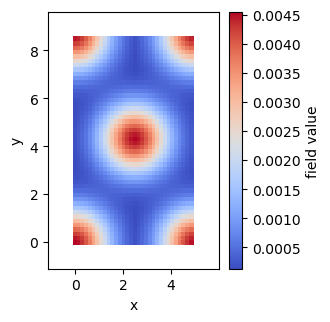

In [1]:
import fieldkit as fk
import numpy as np

# initialize a field with the appropriate cell size
npw=(32,48)
Lx = 5.0
Ly = Lx*np.sqrt(3)
h = np.array([[Lx,0],[0,Ly]])
field_wminus = fk.Field(npw=npw,h=h) 

fk.add_gaussian(field_wminus,center=(0,0), sigma=1.0)
fk.add_gaussian(field_wminus,center=(0.5*Lx,0.5*Ly), sigma=1.0) 

fk.plot(field_wminus,dpi=100)

Now lets randomly initialize the $w_+$ field

In [2]:
field_wplus = fk.Field(npw=npw,h=h)
field_wplus.data = np.random.random(npw)

Finally we can write the two fields to a file which can be read using OpenFTS

In [3]:
fk.write_to_file('fields_in.dat',[field_wplus, field_wminus])

Writting 2 fields to fields_in.dat


Fieldkit has a number of build-in functions for initializing fields. For example, it is easy to initialize the A15 phase:

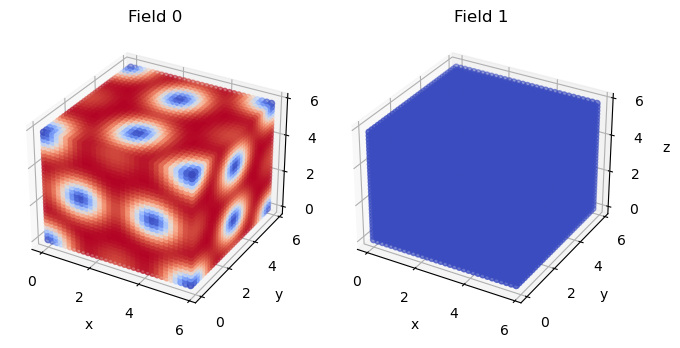

In [9]:
npw = (32,32,32)
h = 6.0* np.eye(3)
fields = fk.initialize_phase("A15", npw, h)
fk.plot(fields)

Internally, this is doing nothing more than placing gaussians at the corresponding location of the A15 micelles. Also note that the 2nd field is blank since that is typically the $w_+$ field. 

You can also use level-set equations to initialized phases. For example, the double gyroid phase:

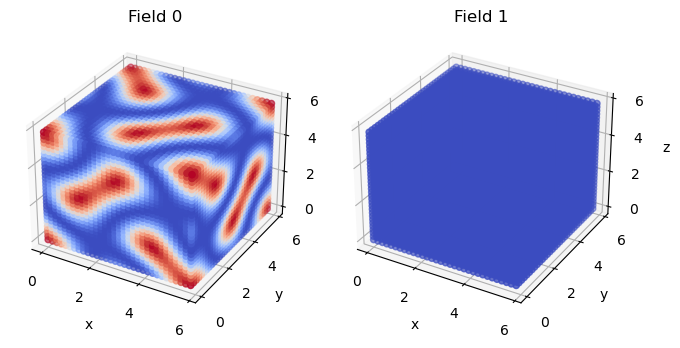

In [14]:
npw = (32,32,32)
h = 6.0* np.eye(3)
fields = fk.initialize_phase("double-gyroid", npw, h)
fk.plot(fields)

## Reading fields from OpenFTS

### 2d example

Reading an OpenFTS field file is just as straightforward 


In [4]:
fields = fk.read_from_file('density_2d_HEX.dat')

This function returns a list of fields corresponding to each field stored in the field file

In [5]:
fields

Plotting a list of fields can use the same `plot()` function as before

Note: ignoring imaginary part of field {ifield} in plot
Note: ignoring imaginary part of field {ifield} in plot


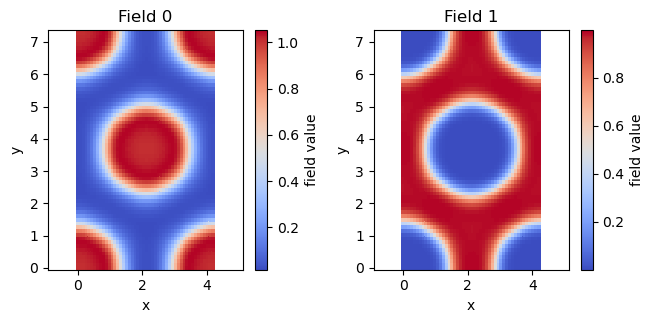

In [6]:
fk.plot(fields)

### 1d example: lamellar phase

Now lets load and plot a 1d field

Note: ignoring imaginary part of field {ifield} in plot
Note: ignoring imaginary part of field {ifield} in plot


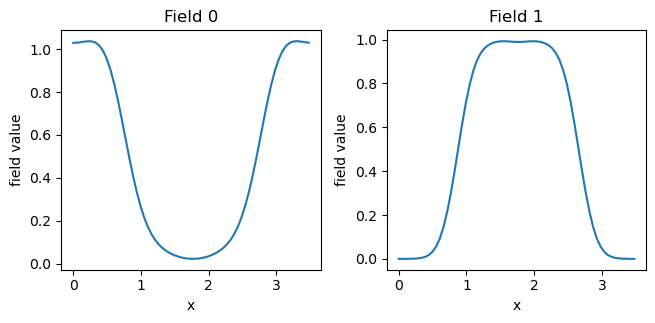

In [7]:
fields = fk.read_from_file('density_1d_LAM.dat')
fk.plot(fields)

### 3d example: A15 phase

Finally, lets load and plot the converged A15 phase from OpenFTS

Note: ignoring imaginary part of field {ifield} in plot
Note: ignoring imaginary part of field {ifield} in plot


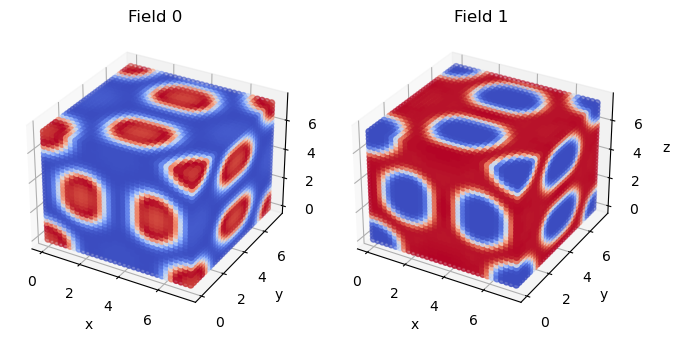

In [8]:
fields = fk.read_from_file('density_3d_A15.dat')
fk.plot(fields)

The output of `fieldkit.plot()` is typically sufficient for quick and dirty plotting but is inadequate for publication quality figures. When high-quality images are needed, it is recommended to first write the fields to a *.vtk* file using `fieldkit.write_to_VTK()` and then vizualize using [paraview](https://www.paraview.org/).

Check out the next tutorial for how to manipulate field files.